<a href="https://colab.research.google.com/github/ed765super/Data602-Assignment-6/blob/main/DATA602_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTRUCTIONS
## DELETE WHEN DONE
The following will be done to the Pima Indian dataset

* Inspect the data and create a pipeline to perform any feature processing
* Prior to building the feature pipeline, be sure to split the data into training/test sets
* Create a logistic regression model pipeline that uses the above pipeline
* Pick a metric you are going to use to select the model and justify your choice.
* Use the above combined pipeline to run a Logistic Regression model with grid search cross-validation using 10 folds. Search 5 different regularization strengths and 2 solvers. * * What is the best model? * * Answer the question: How does it perform on the test set?

All of this will be done while im predicting the class column


#Import Dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('pima_indian_data.csv', sep=',')
df

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Initial EDA

In [2]:
df.dtypes

Number  of times pregnant       int64
Plasma glucose                  int64
Diastolic blood pressure        int64
Triceps skinfold thickness      int64
serum insulin                   int64
Body mass index               float64
Diabetes pedigree function    float64
Age                             int64
Class                           int64
dtype: object

* All the datatypes look reasonable.
* All of the data is numerical with a small variatiion of scale. we will standardize these fatures 
* Since this is a binary classification problem, I'm hinking of turning class into a boolean, but that may be stupid.

In [3]:
print(df.isna().sum())

Number  of times pregnant     0
Plasma glucose                0
Diastolic blood pressure      0
Triceps skinfold thickness    0
serum insulin                 0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64


There are no NULL values I have to deal with. Therefore imputing will not be nessessary

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plasma glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Diastolic blood pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps skinfold thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
serum insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Body mass index,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


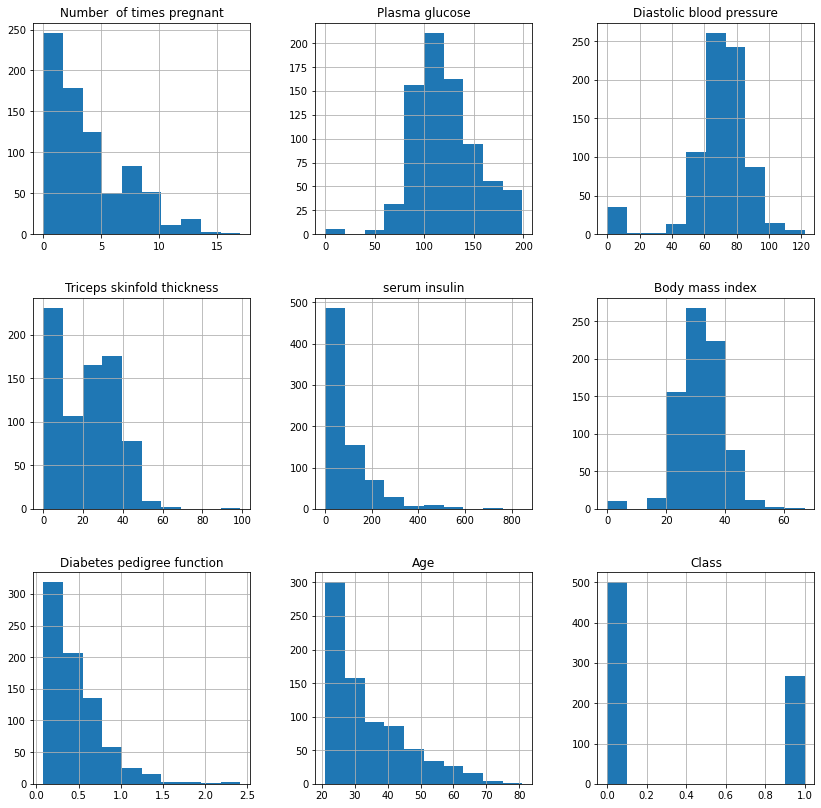

In [6]:
df.hist(figsize=(14,14))
plt.show()

Plasma glucose and Diastolic preasure has a general uniform distribution while the rest of the columns are skewed in one way or another.

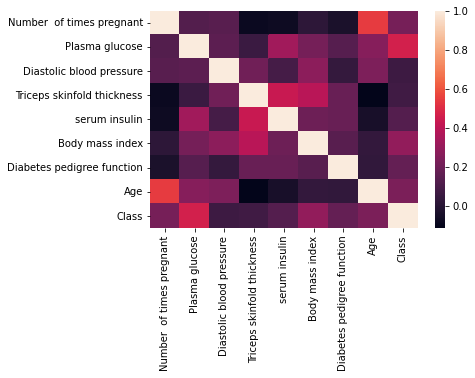

In [8]:
import seaborn as sns

sns.heatmap(df.corr())
plt.show()

* There is no obvious correlation issues

#Training Test Split

In [51]:
from sklearn.model_selection import train_test_split
curr_Random_State = 50

feature_names = df.columns[:-1]
#The :-1 excludes the last column which is the target column.

def create_splits(x, y, state):
    return (train_test_split(x, y, test_size=.25, random_state = state)
    )
X_training, X_test, y_training, y_test = create_splits(df[feature_names], df['Class'], curr_Random_State)
print(f'Training samples: {X_training.shape[0]}')
print(f'Test samples: {X_test.shape[0]}')

Training samples: 576
Test samples: 192


#Create Pipeline

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
def generate_estimates(comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('model', LogisticRegression(penalty='none'))
        ]
    )

    return modeling_pipeline

ValueError: ignored

In [63]:
import sklearn
print("All Valid cross val scoring metrics: ")
sorted(sklearn.metrics.SCORERS.keys())

All Valid cross val scoring metrics: 


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

### Metrics I will use:
* recall: Since most of the data is highly skewed in one way or another, I will focus more on recall than accuracy.
* roc_auc: I will also be testing on roc to ensure that my model, at the very least, is not coin flipping

* I will not be using any of the f1 scores since I am not using accuracy due to the skewed data may cause the accuracy to show bias

In [64]:
from sklearn.model_selection import cross_validate

clf = generate_estimates()
cv_results = cross_validate(clf, X_training, y_training, 
                            scoring=['recall', 'roc_auc', 'r2'], cv=5)
cv_results

{'fit_time': array([0.01071286, 0.00581646, 0.0059104 , 0.00663161, 0.00570703]),
 'score_time': array([0.0046978 , 0.00423741, 0.00458121, 0.00429416, 0.00413108]),
 'test_r2': array([-0.06842105, -0.035     , -0.15      , -0.20276653, -0.04757085]),
 'test_recall': array([0.525     , 0.525     , 0.475     , 0.48717949, 0.58974359]),
 'test_roc_auc': array([0.80592105, 0.809     , 0.74466667, 0.81140351, 0.84817814])}

#Predict on the test set

In [59]:
from sklearn.metrics import confusion_matrix
modeling_pipeline.fit(X_training, y_training)
y_test_pred = modeling_pipeline.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[108  14]
 [ 36  34]]


#determine performance estimates

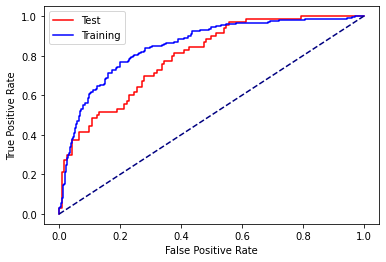

0.7973067915690867


In [56]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=modeling_pipeline):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_training, generate_probs(X_training))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, generate_probs(X_test)))

The Roc curve doesnt look perfect. However it is still a solid chunk above y=x where 75% of the area is under the curve

#Cross Validation
Since the dataset is really small, I will use cross-validation to determine what model to use for this